## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## Read dataset

* csv hatings

In [2]:
# Caminho do banco de dados
datapath = '../../dataset/ml-100k.csv'

# Leitura dos dados
raw_data = pd.read_csv(datapath, delim_whitespace=True, header=None)

In [3]:
raw_data.head()

,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
0,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
raw_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
count,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,...,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000
mean,1.858961,0.445387,0.289502,0.786850,0.301166,0.098621,1.579003,0.927890,1.235419,0.361612,...,0.003181,0.004242,0.003181,0.002121,0.003181,0.001060,0.003181,0.002121,0.003181,0.003181
std,2.042084,1.166107,0.966513,1.543481,0.992792,0.623179,1.977008,1.755518,1.906447,1.162804,...,0.097693,0.130258,0.097693,0.065129,0.097693,0.032564,0.097693,0.065129,0.097693,0.097693
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,3.000000,4.000000,3.000000,2.000000,3.000000,1.000000,3.000000,2.000000,3.000000,3.000000


In [5]:
raw_data.head()

,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
0,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# Substituio os zeros (avalizações não feitas) por NaN
data = raw_data.copy()
data.replace(0, np.nan, inplace=True)

In [7]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
count,452.000000,131.000000,90.000000,209.000000,86.000000,26.000000,392.000000,219.000000,299.000000,89.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,3.878319,3.206107,3.033333,3.550239,3.302326,3.576923,3.798469,3.995434,3.896321,3.831461,...,3.0,4.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0
std,0.927897,0.966497,1.212760,0.965069,0.946446,1.301478,0.982037,1.002281,1.042368,1.013948,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.0,4.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0
25%,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.0,4.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0
50%,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,3.0,4.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0
75%,5.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,3.0,4.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,3.0,4.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0


* u.item

In [8]:
cols = ['movie id', 
        'movie title',
        'release date',
        'video release date',
        'IMDb URL',
        'unknown',
        'Action',
        'Adventure',
        'Animation', 
        "Children's", 
        'Comedy', 
        'Crime', 
        'Documentary', 
        'Drama', 
        'Fantasy', 
        'Film-Noir',
        'Horror', 
        'Musical',
        'Mystery', 
        'Romance',
        'Sci-Fi', 
        'Thriller',
        'War',
        'Western']

In [9]:
# Caminho do banco de dados
datapath = '../../dataset/ml-100k/u.item'

# Leitura dos dados
raw_item = pd.read_csv(datapath, delimiter='|', names=cols)

In [10]:
raw_item.head()

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [11]:
raw_item.describe()

,movie id,video release date,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1682.000000,0.0,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,...,1682.00000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000
mean,841.500000,NaN,0.001189,0.149227,0.080262,0.024970,0.072533,0.300238,0.064804,0.029727,...,0.01308,0.014269,0.054697,0.033294,0.036266,0.146849,0.060048,0.149227,0.042212,0.016052
std,485.695893,NaN,0.034473,0.356418,0.271779,0.156081,0.259445,0.458498,0.246253,0.169882,...,0.11365,0.118632,0.227455,0.179456,0.187008,0.354061,0.237646,0.356418,0.201131,0.125714
min,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,421.250000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,841.500000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1261.750000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
item = raw_item.copy()
item.replace(0, np.nan, inplace=True)

In [13]:
item = item.drop('video release date', axis=1)

In [14]:
item.head()

,movie id,movie title,release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,NaN,NaN,NaN,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,GoldenEye (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?GoldenEye%20(...,NaN,1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
2,3,Four Rooms (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Four%20Rooms%...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
3,4,Get Shorty (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Get%20Shorty%...,NaN,1.0,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Copycat (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Copycat%20(1995),NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


## Média, desvio padrão e variância das avaliações

* Média

In [15]:
# Função que mostra a media das avaliações por filme 'n'
def media_avaliacao(n):
    ma=round(np.mean(data.loc[:,n:n]),2).item()
    return ma

In [16]:
media_avaliacao(0)

3.88

* Desvio padrão

In [17]:
# Função que mostra o desvio padrão das avaliações por filme 'n'
def desv_pad_avaliacao(n):
    dpa=round(np.std(data.loc[:,n:n]),2).item()
    return dpa

In [18]:
desv_pad_avaliacao(0)

0.93

* Variância

In [19]:
# Função que mostra a variância das avaliações por filme 'n'
def var_avaliacao(n):
    va=round(np.var(data.loc[:,n:n]),2).item()
    return va

In [20]:
var_avaliacao(0)

0.86

## Média, desvio padrão e variância dos usuários

* Média

In [21]:
# Função que mostra a media das avaliações por usuário 'n'
media_usuario = []
for n in range(len(data.index)):
    media_usuario.append(np.mean(data.loc[n:n,:], axis=1).item())

In [22]:
media_usuario[0]

3.610294117647059

In [23]:
# Adiciona a coluna 'Média' ao data frame
data['Média'] = media_usuario

In [24]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,Média
0,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.610294
1,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.709677
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.796296
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.333333
4,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.874286


* Desvio padrão

In [25]:
# Função que mostra o desvio padrão das avaliações por usuário 'n'
desvio_padrao_usuario = []
for n in range(len(data.index)):
    desvio_padrao_usuario.append(np.std(data.loc[n:n,:], axis=1).item())

In [26]:
desvio_padrao_usuario[0]

1.2589477210595874

In [27]:
# Adiciona o 'Desvio padrão' ao data frame
data['Desvio padrão'] = desvio_padrao_usuario

In [28]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,1674,1675,1676,1677,1678,1679,1680,1681,Média,Desvio padrão
0,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.610294,1.258948
1,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.709677,1.013983
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.796296,1.196656
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.333333,0.879394
4,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.874286,1.355197


* Variância

In [29]:
# Função que mostra a variância das avaliações por usuário 'n'
var_usuario = []
for n in range(len(data.index)):
    var_usuario.append(np.var(data.loc[n:n,:], axis=1).item())

In [30]:
var_usuario[0]

1.5992694457522074

In [31]:
# Adiciona a 'Variância' ao data frame
data['Variância'] = var_usuario

In [32]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,1675,1676,1677,1678,1679,1680,1681,Média,Desvio padrão,Variância
0,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.610294,1.258948,1.599269
1,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.709677,1.013983,1.123866
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.796296,1.196656,1.451293
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.333333,0.879394,1.184777
4,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.874286,1.355197,1.839146


## Indivíduos com avalições uniformes

Isso significa menor variânica

In [33]:
# Função que mostra os top n indivíduos com menor variânica nas avaliações
def avaliacoes_uniformes(n):
    au=data.sort_values('Variância').loc[:,'Variância'].head(n)
    return(au)

In [34]:
avaliacoes_uniformes(5)

551    0.368217
9      0.404494
274    0.412645
59     0.449269
500    0.467368
Name: Variância, dtype: float64

## Indivíduos com avaliações divergentes

Isso significa maior variância

In [35]:
# Função que mostra os top n indivíduos com maior variânica nas avaliações
def avaliacoes_divergentes(n):
    ad=data.sort_values('Variância', ascending=False).loc[:,'Variância'].head(n)
    return(ad)

In [36]:
avaliacoes_divergentes(10)

608    2.771939
761    2.562267
530    2.560964
37     2.528161
173    2.464243
67     2.418755
218    2.411151
178    2.410990
198    2.330240
126    2.299802
Name: Variância, dtype: float64

## Indivíduos com avaliações fora do padrão (**outliers**)

### z-score

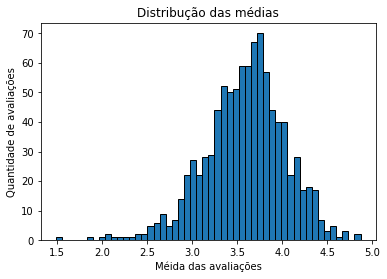

In [37]:
# Dados para o eixo 'y'
y = data['Média']

# Histograma do Matplotlib
plot = plt.hist(y, edgecolor='black', bins=50)

# Nomes dos eixos
plt.title('Distribução das médias')
plt.xlabel('Méida das avaliações')
plt.ylabel('Quantidade de avaliações')

# Plot
plt.show(plot)

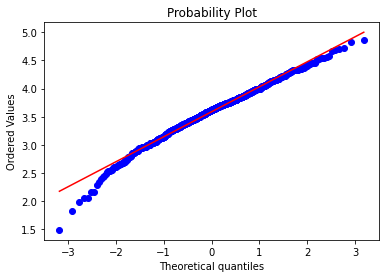

In [38]:
# Plot da distribuição normal
stats.probplot(y, dist='norm', plot=plt)
plt.show()

In [39]:
np.std(data['Média'], ddof = 3)

0.44570689613815023

In [40]:
x = data['Média']
x_mean = data['Média'].mean()
x_sd = np.std(data['Média'], ddof = 1)

z_score = (x - x_mean)/x_sd

zs_data = pd.DataFrame({'Médias':x, 'Z-score':z_score})
zs_data

,Médias,Z-score
0,3.610294,0.049644
1,3.709677,0.272860
2,2.796296,-1.778606
3,4.333333,1.673599
4,2.874286,-1.603440
...,...,...
938,4.265306,1.520809
939,3.457944,-0.292537
940,4.045455,1.027019
941,4.265823,1.521969


In [41]:
data['Z-score'] = z_score
data

,0,1,2,3,4,5,6,7,8,9,...,1676,1677,1678,1679,1680,1681,Média,Desvio padrão,Variância,Z-score
0,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,3.610294,1.258948,1.599269,0.049644
1,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,3.709677,1.013983,1.123866,0.272860
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.796296,1.196656,1.451293,-1.778606
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.333333,0.879394,1.184777,1.673599
4,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.874286,1.355197,1.839146,-1.603440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.265306,0.954474,1.103876,1.520809
939,NaN,NaN,NaN,2.0,NaN,NaN,4.0,5.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.457944,1.002593,1.050772,-0.292537
940,5.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.045455,0.858577,1.111982,1.027019
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.265823,0.753473,0.711136,1.521969


In [42]:
zs_data.sort_values('Z-score', ascending=False).head(1)

,Médias,Z-score
848,4.869565,2.877982


Considerando **outliers** indivíduos com Z-Score > 3, não temos tais indivíduos no lado direito do conjunto de dados.  
Entretando, no lado esquerdo, para Z-Score < -3, temos:

In [43]:
zs_data.sort_values('Z-score').head(1)

,Médias,Z-score
180,1.491954,-4.708175


In [44]:
data.loc[data['Z-score']<-3]

,0,1,2,3,4,5,6,7,8,9,...,1676,1677,1678,1679,1680,1681,Média,Desvio padrão,Variância,Z-score
180,3.0,NaN,2.0,NaN,NaN,1.0,4.0,NaN,4.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.491954,0.844195,0.711992,-4.708175
205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.171875,1.441737,2.055067,-3.181064
404,NaN,1.0,NaN,4.0,4.0,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.834464,1.343359,1.802497,-3.938893
444,3.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.985185,1.091310,1.188055,-3.600371
684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.050000,0.722100,0.574235,-3.454796
723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.164706,1.301583,1.683110,-3.197166
773,NaN,1.0,NaN,2.0,NaN,NaN,2.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.058036,1.135773,1.288019,-3.436748


### DataFrame sem **outliers**

In [45]:
no_out_data = data.loc[data['Z-score']>-3]

In [46]:
no_out_data

,0,1,2,3,4,5,6,7,8,9,...,1676,1677,1678,1679,1680,1681,Média,Desvio padrão,Variância,Z-score
0,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,3.610294,1.258948,1.599269,0.049644
1,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,3.709677,1.013983,1.123866,0.272860
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.796296,1.196656,1.451293,-1.778606
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.333333,0.879394,1.184777,1.673599
4,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.874286,1.355197,1.839146,-1.603440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.265306,0.954474,1.103876,1.520809
939,NaN,NaN,NaN,2.0,NaN,NaN,4.0,5.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.457944,1.002593,1.050772,-0.292537
940,5.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.045455,0.858577,1.111982,1.027019
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.265823,0.753473,0.711136,1.521969


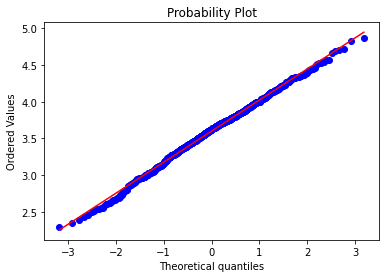

In [47]:
# Dados para o eixo 'y'
y = no_out_data['Média']

# Plot da distribuição normal
stats.probplot(y, dist='norm', plot=plt)
plt.show()

## Distância

In [48]:
# Define o vetor usuario
def usuario(i):
    usr=raw_data.loc[i]
    return(usr)

In [49]:
usuario(0)

0       5.0
1       3.0
2       4.0
3       3.0
4       3.0
       ... 
1677    0.0
1678    0.0
1679    0.0
1680    0.0
1681    0.0
Name: 0, Length: 1682, dtype: float64

### Similaridade de Cosseno

In [50]:
# Define uma função que calcule a similaridade de coseno entre dois usuários 'i' e 'j'
def sim_coseno(i, j):
    simc=np.dot(usuario(i), usuario(j))/(np.linalg.norm(usuario(i))*np.linalg.norm(usuario(j)))
    return(simc)

In [51]:
sim_coseno(0,0)

1.0

In [52]:
data.sort_values('Z-score', ascending=False).index

Int64Index([848, 687, 506, 627, 927, 117, 906, 685, 426, 564,
            ...
            608, 625, 864, 205, 723, 773, 684, 444, 404, 180],
           dtype='int64', length=943)

In [53]:
# Usuários distantes pelo Z-score
sim_coseno(180,848)

0.11825231269477364

### Correlação de Pearson

In [54]:
# Define uma função que calcula os coeficiente de Pearson entre dois usuários 'i' e 'j'
def sim_pearson(i, j):
    spe=np.corrcoef(usuario(i), usuario(j))
    return(spe)

In [55]:
sim_pearson(0, 0)

array([[1., 1.],
       [1., 1.]])

In [56]:
sim_pearson(180, 848)

array([[1.        , 0.07481371],
       [0.07481371, 1.        ]])

## Gêneros com mais exemplares

In [57]:
item.columns

Index(['movie id', 'movie title', 'release date', 'IMDb URL', 'unknown',
       'Action', 'Adventure', 'Animation', 'Children's', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

In [58]:
genre = ['Action',
        'Adventure',
        'Animation', 
        "Children's", 
        'Comedy', 
        'Crime', 
        'Documentary', 
        'Drama', 
        'Fantasy', 
        'Film-Noir',
        'Horror', 
        'Musical',
        'Mystery', 
        'Romance',
        'Sci-Fi', 
        'Thriller',
        'War',
        'Western']

In [59]:
item[genre].count(axis=0).sort_values(ascending=False)

Drama          725
Comedy         505
Action         251
Thriller       251
Romance        247
Adventure      135
Children's     122
Crime          109
Sci-Fi         101
Horror          92
War             71
Mystery         61
Musical         56
Documentary     50
Animation       42
Western         27
Film-Noir       24
Fantasy         22
dtype: int64

## Dados faltantes

In [60]:
raw_item.isnull().sum().sort_values(ascending=False)

video release date    1682
IMDb URL                 3
release date             1
movie id                 0
Fantasy                  0
War                      0
Thriller                 0
Sci-Fi                   0
Romance                  0
Mystery                  0
Musical                  0
Horror                   0
Film-Noir                0
Documentary              0
Drama                    0
movie title              0
Crime                    0
Comedy                   0
Children's               0
Animation                0
Adventure                0
Action                   0
unknown                  0
Western                  0
dtype: int64

## DataFrame condensado

In [61]:
raw_item.set_index('movie id', inplace=True)

genres_item = raw_item[raw_item == 1].stack().reset_index().drop(0,1).rename(columns={"level_1":"genre"})
genres_item.head()

,movie id,genre
0,1,Animation
1,1,Children's
2,1,Comedy
3,2,Action
4,2,Adventure


In [62]:
group_genres_item = pd.DataFrame(genres_item.groupby('movie id')['genre'].apply(list)).reset_index()
group_genres_item

,movie id,genre
0,1,"[Animation, Children's, Comedy]"
1,2,"[Action, Adventure, Thriller]"
2,3,[Thriller]
3,4,"[Action, Comedy, Drama]"
4,5,"[Crime, Drama, Thriller]"
...,...,...
1677,1678,[Drama]
1678,1679,"[Romance, Thriller]"
1679,1680,"[Drama, Romance]"
1680,1681,[Comedy]


In [63]:
raw_item.reset_index(inplace=True)

In [64]:
raw_item_cols = ['movie id',
                 'movie title',
                 'release date',
                 'video release date',
                 'IMDb URL',
                ]

In [65]:
cond_item = pd.concat([raw_item[raw_item_cols],group_genres_item['genre']], axis=1)
cond_item

,movie id,movie title,release date,video release date,IMDb URL,genre
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,"[Animation, Children's, Comedy]"
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,"[Action, Adventure, Thriller]"
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,[Thriller]
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,"[Action, Comedy, Drama]"
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),"[Crime, Drama, Thriller]"
...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,[Drama]
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,"[Romance, Thriller]"
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),"[Drama, Romance]"
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,[Comedy]


## DataFrame com estatísticas dos filmes

* Total de avaliações por filme

In [66]:
total_avaliacao = pd.DataFrame(data.loc[:,0:1681].count())
total_avaliacao

,0
0,452
1,131
2,90
3,209
4,86
...,...
1677,1
1678,1
1679,1
1680,1


In [67]:
cond_item['total ratings'] = total_avaliacao

* Soma das avaliações

In [68]:
soma_avaliacao = pd.DataFrame(data.loc[:,0:1681].sum().round(2))
soma_avaliacao

,0
0,1753.0
1,420.0
2,273.0
3,742.0
4,284.0
...,...
1677,1.0
1678,3.0
1679,2.0
1680,3.0


In [69]:
cond_item['sum ratings'] = soma_avaliacao

* Média

In [70]:
cond_item['mean rating'] = round(soma_avaliacao/total_avaliacao, 2)

* Máximo

In [71]:
max_avaliacao = pd.DataFrame(data.loc[:,0:1681].max())
max_avaliacao

,0
0,5.0
1,5.0
2,5.0
3,5.0
4,5.0
...,...
1677,1.0
1678,3.0
1679,2.0
1680,3.0


In [72]:
cond_item['max rating'] = max_avaliacao

* Mínimo

In [73]:
min_avaliacao = pd.DataFrame(data.loc[:,0:1681].min())
min_avaliacao

,0
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
1677,1.0
1678,3.0
1679,2.0
1680,3.0


In [74]:
cond_item['min rating'] = min_avaliacao

* Desvio padrão

In [75]:
std_avaliacao = pd.DataFrame(data.loc[:,0:1681].std().round(2))
std_avaliacao

,0
0,0.93
1,0.97
2,1.21
3,0.97
4,0.95
...,...
1677,NaN
1678,NaN
1679,NaN
1680,NaN


In [76]:
cond_item['standard deviation'] = std_avaliacao

* Variância

In [77]:
var_avaliacao = pd.DataFrame(data.loc[:,0:1681].var().round(2))
var_avaliacao

,0
0,0.86
1,0.93
2,1.47
3,0.93
4,0.90
...,...
1677,NaN
1678,NaN
1679,NaN
1680,NaN


In [78]:
cond_item['variance'] = var_avaliacao

In [79]:
cond_item.head()

,movie id,movie title,release date,video release date,IMDb URL,genre,total ratings,sum ratings,mean rating,max rating,min rating,standard deviation,variance
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,"[Animation, Children's, Comedy]",452,1753.0,3.88,5.0,1.0,0.93,0.86
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,"[Action, Adventure, Thriller]",131,420.0,3.21,5.0,1.0,0.97,0.93
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,[Thriller],90,273.0,3.03,5.0,1.0,1.21,1.47
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,"[Action, Comedy, Drama]",209,742.0,3.55,5.0,1.0,0.97,0.93
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),"[Crime, Drama, Thriller]",86,284.0,3.30,5.0,1.0,0.95,0.90


## Maior e menor número de avaliações

In [80]:
cond_item.sort_values('total ratings', ascending=False).head()

,movie id,movie title,release date,video release date,IMDb URL,genre,total ratings,sum ratings,mean rating,max rating,min rating,standard deviation,variance
49,50,Star Wars (1977),01-Jan-1977,NaN,http://us.imdb.com/M/title-exact?Star%20Wars%2...,"[Action, Adventure, Romance, Sci-Fi, War]",583,2541.0,4.36,5.0,1.0,0.88,0.78
257,258,Contact (1997),11-Jul-1997,NaN,http://us.imdb.com/Title?Contact+(1997/I),"[Drama, Sci-Fi]",509,1936.0,3.80,5.0,1.0,0.99,0.99
99,100,Fargo (1996),14-Feb-1997,NaN,http://us.imdb.com/M/title-exact?Fargo%20(1996),"[Crime, Drama, Thriller]",508,2111.0,4.16,5.0,1.0,0.98,0.95
180,181,Return of the Jedi (1983),14-Mar-1997,NaN,http://us.imdb.com/M/title-exact?Return%20of%2...,"[Action, Adventure, Romance, Sci-Fi, War]",507,2032.0,4.01,5.0,1.0,0.92,0.85
293,294,Liar Liar (1997),21-Mar-1997,NaN,http://us.imdb.com/Title?Liar+Liar+(1997),[Comedy],485,1531.0,3.16,5.0,1.0,1.10,1.21


In [81]:
cond_item['total ratings'].max()

583

In [82]:
cond_item.sort_values('total ratings').head()

,movie id,movie title,release date,video release date,IMDb URL,genre,total ratings,sum ratings,mean rating,max rating,min rating,standard deviation,variance
1681,1682,Scream of Stone (Schrei aus Stein) (1991),08-Mar-1996,NaN,http://us.imdb.com/M/title-exact?Schrei%20aus%...,[Drama],1,3.0,3.0,3.0,3.0,NaN,NaN
813,814,"Great Day in Harlem, A (1994)",01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Great%20Day%2...,[Documentary],1,5.0,5.0,5.0,5.0,NaN,NaN
1446,1447,Century (1993),01-Jan-1993,NaN,http://us.imdb.com/M/title-exact?Century%20(1993),[Drama],1,3.0,3.0,3.0,3.0,NaN,NaN
1592,1593,Death in Brunswick (1991),16-Aug-1996,NaN,http://us.imdb.com/M/title-exact?Death%20in%20...,[Comedy],1,4.0,4.0,4.0,4.0,NaN,NaN
1451,1452,Lady of Burlesque (1943),01-Jan-1943,NaN,http://us.imdb.com/M/title-exact?Lady%20of%20B...,"[Comedy, Mystery]",1,4.0,4.0,4.0,4.0,NaN,NaN


In [83]:
cond_item['total ratings'].min()

1

## Normalização

### Máximo-mínimo

In [84]:
def norm_max_min(m_id):
    idx = m_id - 1
    movie = cond_item.loc[cond_item['movie id'] == m_id]
    nmm = data.loc[idx:idx,:].apply(lambda x: (x - movie['min rating'])/(movie['max rating'] - movie['min rating'])).dropna(axis=1).iloc[:,0:-4]
    return(nmm)

In [85]:
# Define uma função que normaliza, pelo método máximo-mínimo, as avaliações
def graph_max_min(m_id):
    idx = m_id - 1
    movie = cond_item.loc[cond_item['movie id'] == m_id]
    nmm = data.loc[idx:idx,:].apply(lambda x: (x - movie['min rating'])/(movie['max rating'] - movie['min rating'])).dropna(axis=1).iloc[:,0:-4]
    
    # Dados para o eixo 'y'
    y = nmm.T

    # Histograma do Matplotlib
    plot = plt.hist(y, edgecolor='black', bins=5)

    # Nomes dos eixos
    plt.title('Normalização Máximo-Mínimo')
    plt.xlabel('Avalições normalizadas')
    plt.ylabel('Quantidade de avaliações')
    
    return(plt.show())

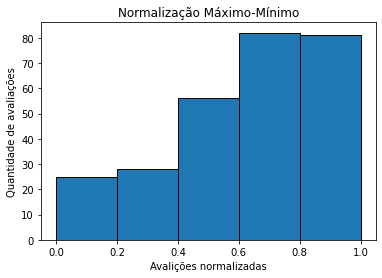

In [86]:
graph_max_min(1)

### Média

In [87]:
# Define uma função que normaliza, pela média, as avaliações
def norm_mean(m_id):
    idx = m_id - 1
    movie = cond_item.loc[cond_item['movie id'] == m_id]
    nm = data.loc[idx:idx,:].apply(lambda x: (x - movie['mean rating'])/(movie['max rating'] - movie['min rating'])).dropna(axis=1).iloc[:,0:-4]
    return(nm)

In [88]:
norm_mean(1)

,0,1,2,3,4,5,6,7,8,9,...,262,263,264,265,266,267,268,269,270,271
0,0.28,-0.22,0.03,-0.22,-0.22,0.28,0.03,-0.72,0.28,-0.22,...,-0.72,-0.47,0.03,-0.72,0.03,0.28,0.28,0.28,-0.47,-0.22


In [89]:
# Define uma função que normaliza, pelo método máximo-mínimo, as avaliações
def graph_mean(m_id):
    idx = m_id - 1
    movie = cond_item.loc[cond_item['movie id'] == m_id]
    nm = data.loc[idx:idx,:].apply(lambda x: (x - movie['mean rating'])/(movie['max rating'] - movie['min rating'])).dropna(axis=1).iloc[:,0:-4]
    
    # Dados para o eixo 'y'
    y = nm.T

    # Histograma do Matplotlib
    plot = plt.hist(y, edgecolor='black', bins=5)

    # Nomes dos eixos
    plt.title('Normalização pela Média')
    plt.xlabel('Avalições normalizadas')
    plt.ylabel('Quantidade de avaliações')
    
    return(plt.show())

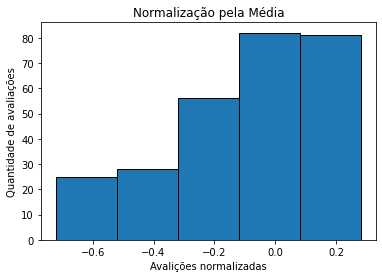

In [90]:
graph_mean(1)

### Z-score

In [92]:
# Define uma função que normaliza, pelo Z-Score, as avaliações
def norm_stand(m_id):
    idx = m_id - 1
    movie = cond_item.loc[cond_item['movie id'] == m_id]
    ns = data.loc[idx:idx,:].apply(lambda x: (x - movie['mean rating'])/movie['standard deviation']).dropna(axis=1).iloc[:,0:-4]
    return(ns)

In [93]:
norm_stand(1)

,0,1,2,3,4,5,6,7,8,9,...,262,263,264,265,266,267,268,269,270,271
0,1.204301,-0.946237,0.129032,-0.946237,-0.946237,1.204301,0.129032,-3.096774,1.204301,-0.946237,...,-3.096774,-2.021505,0.129032,-3.096774,0.129032,1.204301,1.204301,1.204301,-2.021505,-0.946237


In [94]:
# Define uma função que normaliza, pelo método máximo-mínimo, as avaliações
def graph_stand(m_id):
    idx = m_id - 1
    movie = cond_item.loc[cond_item['movie id'] == m_id]
    ns = data.loc[idx:idx,:].apply(lambda x: (x - movie['mean rating'])/movie['standard deviation']).dropna(axis=1).iloc[:,0:-4]
    
    # Dados para o eixo 'y'
    y = ns.T

    # Histograma do Matplotlib
    plot = plt.hist(y, edgecolor='black', bins=5)

    # Nomes dos eixos
    plt.title('Normalização Z-Score')
    plt.xlabel('Avalições normalizadas')
    plt.ylabel('Quantidade de avaliações')
    
    return(plt.show())

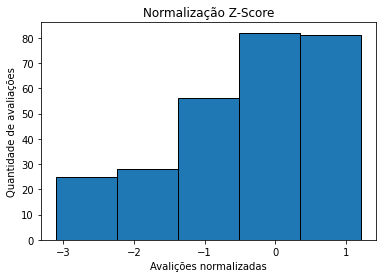

In [98]:
graph_stand(1)